In [1]:
# Importing Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # Only need Pyplot
from matplotlib.cbook import boxplot_stats

# Set the default Seaborn style for graphics
sb.set(rc={"figure.figsize":(30, 7)})

In [5]:
dataset = pd.read_csv("train.csv", index_col="Id") # index_col to select a row as index
dataset

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


# Problem 1: Analysis of Numeric Variables
### Analyze the following numeric variables in the dataset and their relationship with SalePrice

In [35]:
# LotArea: Lot size in square feet
# GrLivArea: Above grade (ground) living area square feet
# TotalBsmtSF: Total square feet of basement area
# GarageArea: Size of garage in square feet

In [33]:
numeric_data = pd.DataFrame(dataset[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']])
numeric_data

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
Id,,,,,
1,8450,1710,856,548,208500
2,9600,1262,1262,460,181500
3,11250,1786,920,608,223500
4,9550,1717,756,642,140000
5,14260,2198,1145,836,250000
...,...,...,...,...,...
1456,7917,1647,953,460,175000
1457,13175,2073,1542,500,210000
1458,9042,2340,1152,252,266500


## 1a: Which of these variables has the maximum number of outliers as per box-plot? How many outliers does it have?

<AxesSubplot:>

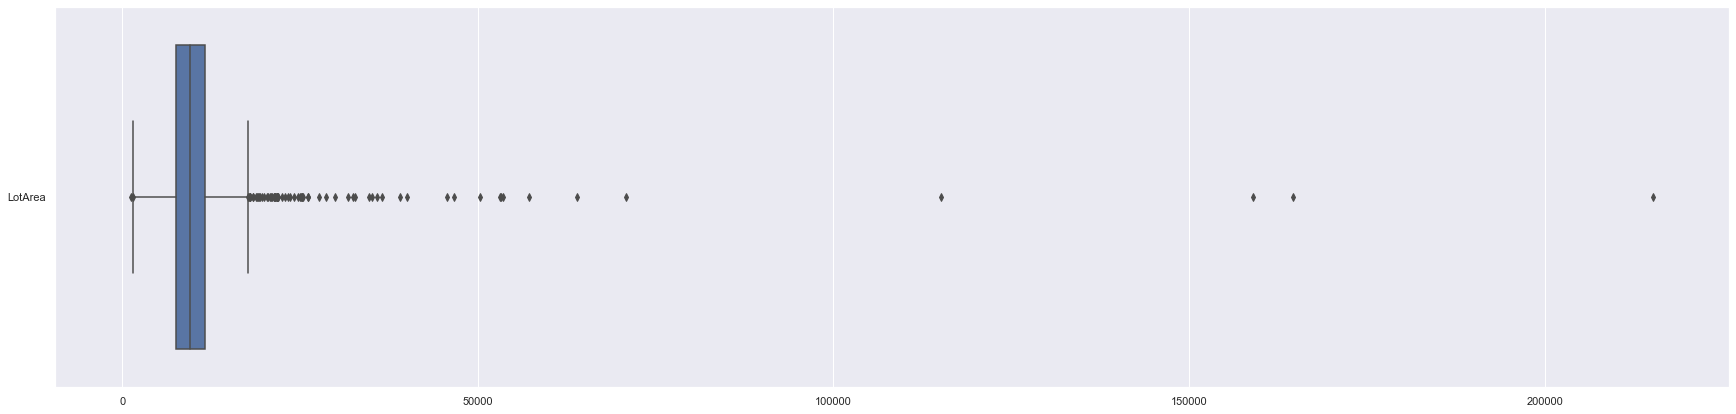

In [9]:
lot_area = pd.DataFrame(dataset["LotArea"])
sb.boxplot(data=lot_area, orient="h")

In [11]:
lot_area_outliers = boxplot_stats(lot_area)[0]["fliers"]
print(f"LotArea has {len(lot_area_outliers)} outliers.")

LotArea has 69 outliers.


<AxesSubplot:>

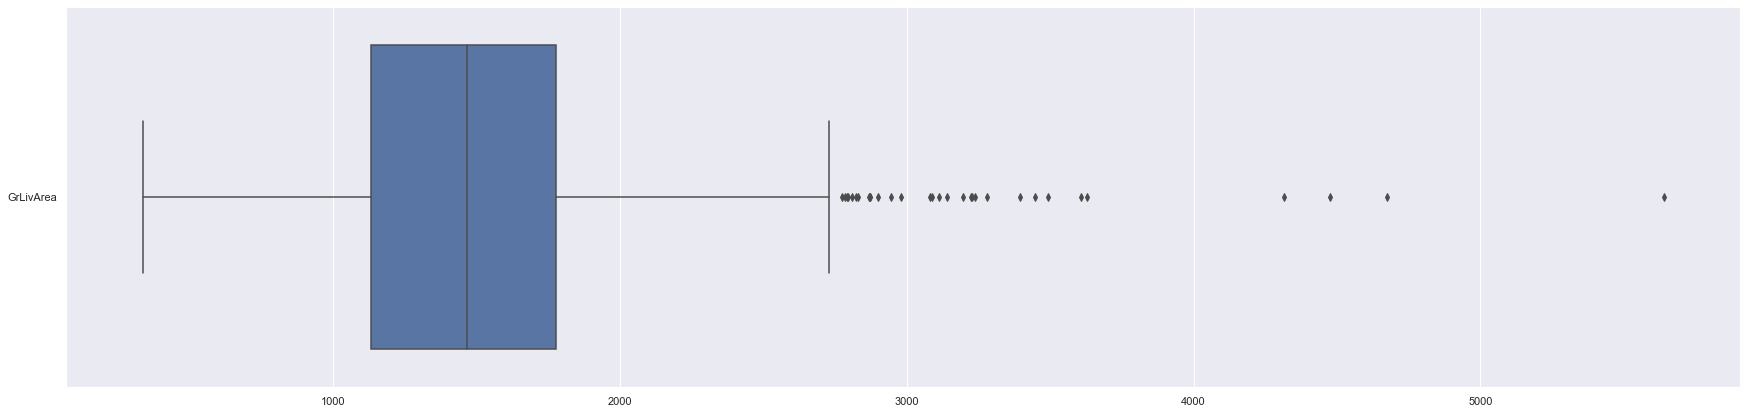

In [13]:
gr_liv_area = pd.DataFrame(dataset["GrLivArea"])
sb.boxplot(data=gr_liv_area, orient="h")

In [15]:
gr_liv_area_outliers = boxplot_stats(gr_liv_area)[0]["fliers"]
print(f"GrLivArea has {len(gr_liv_area_outliers)} outliers.")

GrLivArea has 31 outliers.


<AxesSubplot:>

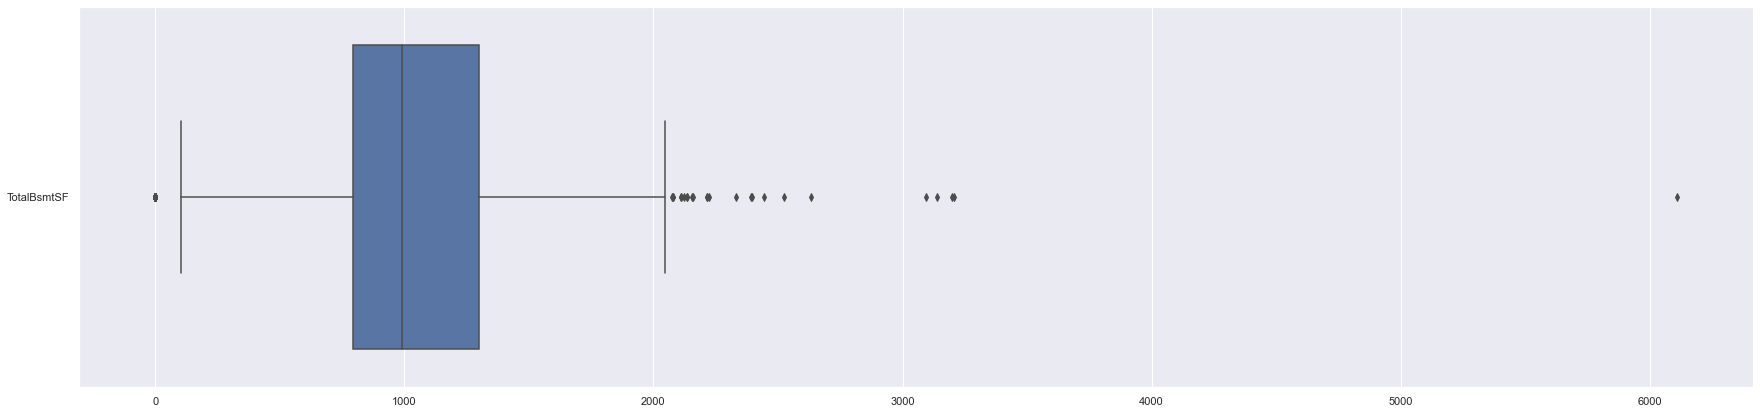

In [16]:
total_bsmt_sf = pd.DataFrame(dataset["TotalBsmtSF"])
sb.boxplot(data=total_bsmt_sf, orient="h")

In [17]:
total_bsmt_sf_outliers = boxplot_stats(total_bsmt_sf)[0]["fliers"]
print(f"TotalBsmtSF has {len(total_bsmt_sf_outliers)} outliers.")

TotalBsmtSF has 61 outliers.


<AxesSubplot:>

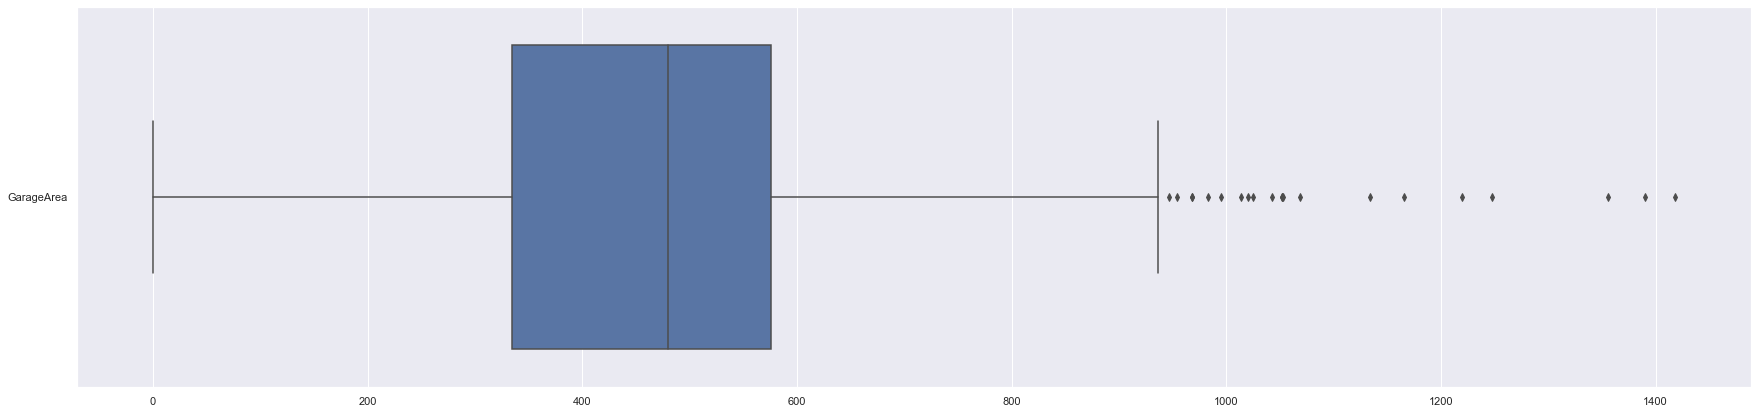

In [18]:
garage_area = pd.DataFrame(dataset["GarageArea"])
sb.boxplot(data=garage_area, orient="h")

In [19]:
garage_area_outliers = boxplot_stats(garage_area)[0]["fliers"]
print(f"GarageArea has {len(garage_area_outliers)} outliers.")

GarageArea has 21 outliers.


### LotArea has the maximum number of outliers (69).

## 1b: Which of these variables is the most skewed from a regular normal distribution? Is the skew positive or negative?

<AxesSubplot:ylabel='Density'>

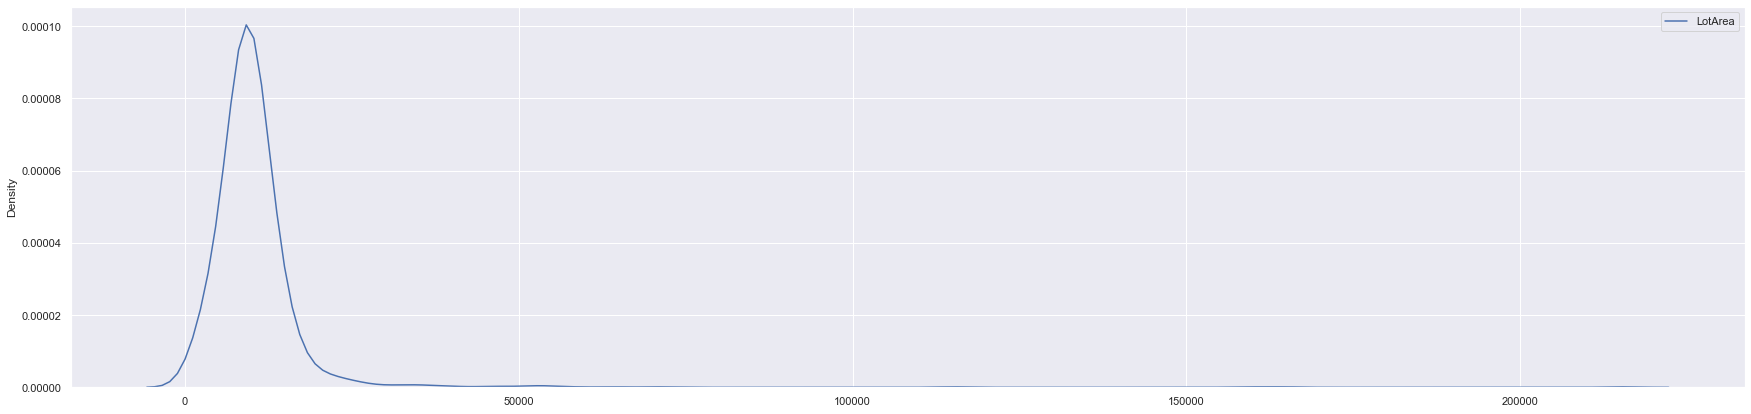

In [20]:
sb.kdeplot(data=lot_area)

In [27]:
numeric_data["LotArea"].skew()

12.207687851233496

<AxesSubplot:ylabel='Density'>

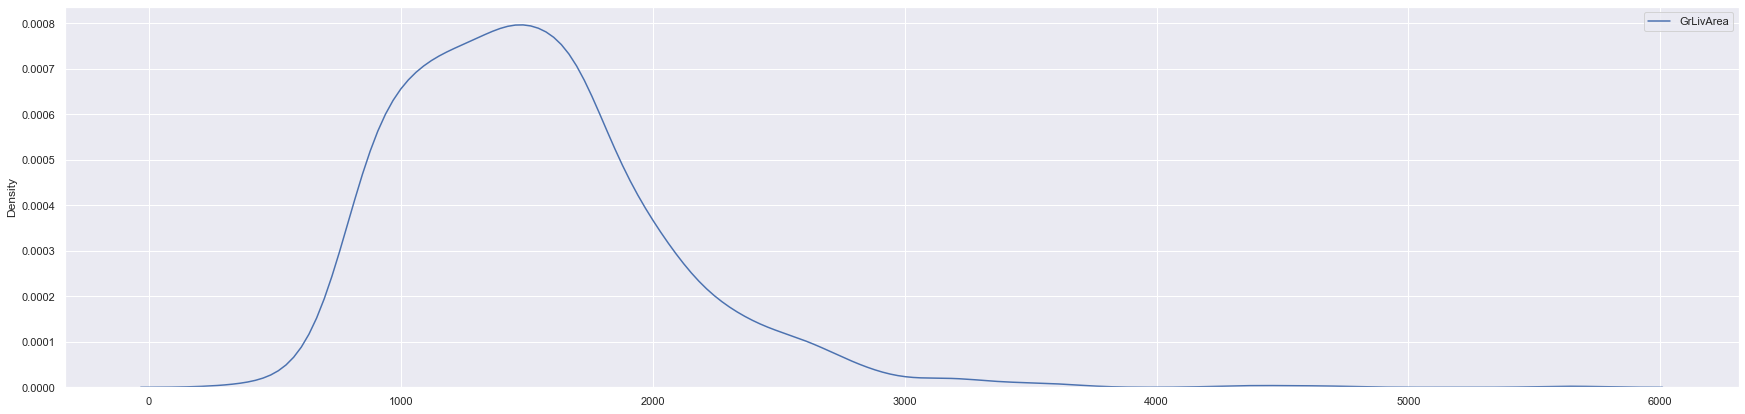

In [21]:
sb.kdeplot(data=gr_liv_area)

In [28]:
numeric_data["GrLivArea"].skew()

1.3665603560164552

<AxesSubplot:ylabel='Density'>

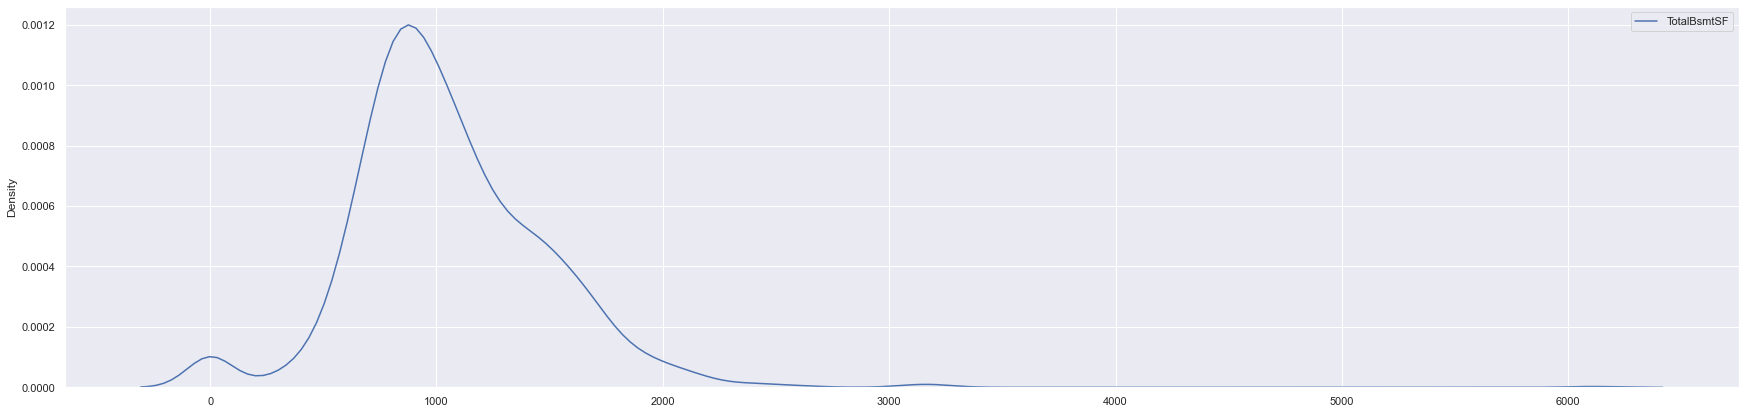

In [23]:
sb.kdeplot(data=total_bsmt_sf)

In [29]:
numeric_data["TotalBsmtSF"].skew()

1.5242545490627664

<AxesSubplot:ylabel='Density'>

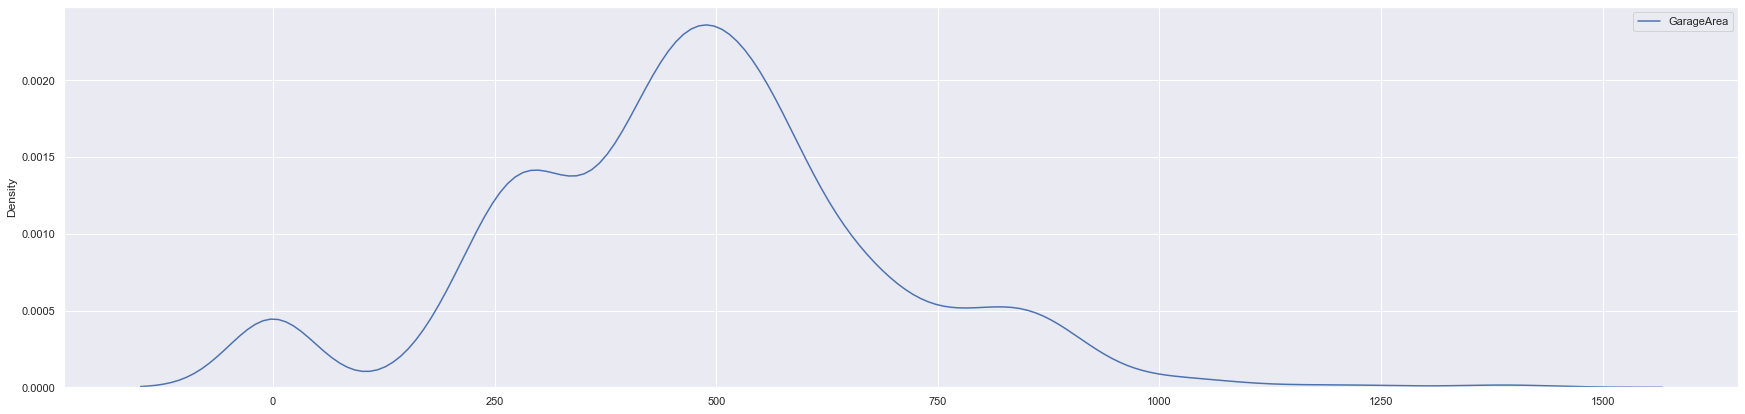

In [24]:
sb.kdeplot(data=garage_area)

In [30]:
numeric_data["GarageArea"].skew()

0.17998090674623907

### LotArea is the most skewed from a normal distribution. The skew is positive.

## 1c: Choose the top two variables that you think will help us the most in predicting ‘SalePrice’ of houses in this data.

In [31]:
saleprice_prediction_dataset = dataset[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']]
saleprice_correlations = saleprice_prediction_dataset.corr()

print(saleprice_correlations["SalePrice"])
# LotArea: Lot size in square feet
# GrLivArea: Above grade (ground) living area square feet
# TotalBsmtSF: Total square feet of basement area
# GarageArea: Size of garage in square feet

LotArea        0.263843
GrLivArea      0.708624
TotalBsmtSF    0.613581
GarageArea     0.623431
SalePrice      1.000000
Name: SalePrice, dtype: float64


<AxesSubplot:>

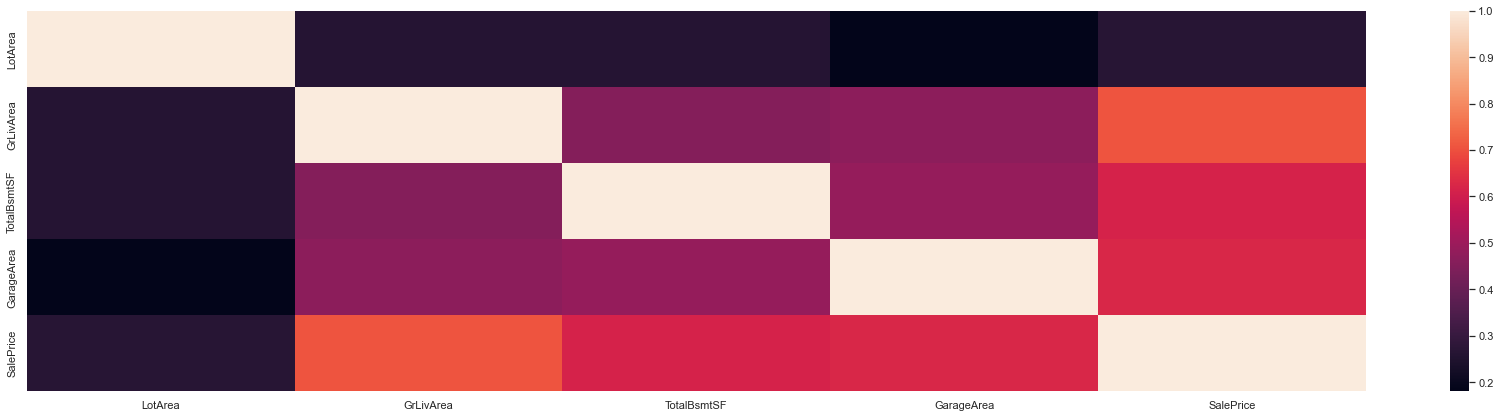

In [32]:
sb.heatmap(saleprice_correlations)

### GrLivArea and GarageArea helps the most in predicting 'SalePrice' of houses. GarageArea and GrLivArea has the highest correlation.

# Problem 2: Analysis of Categorical Variables
### Analyze the following categorical variables in the data and their relationship with SalePrice.

## 2a: Which of these variables has the highest number of levels? Which of the levels has the highest number of houses?

In [34]:
# MSSubClass: Identifies the type of dwelling involved in the sale
# Neighborhood: Physical locations within Ames city limits
# BldgType: Type of dwelling
# OverallQual: Rates the overall material and finish of the house

In [37]:
# Number of unique MSSubClass categories in the Dataset
print("Number of MSSubClass Types: ", len(dataset["MSSubClass"].unique()))

Number of MSSubClass Types:  15


In [38]:
# Data for each MSSubClass category
print(dataset["MSSubClass"].value_counts())

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


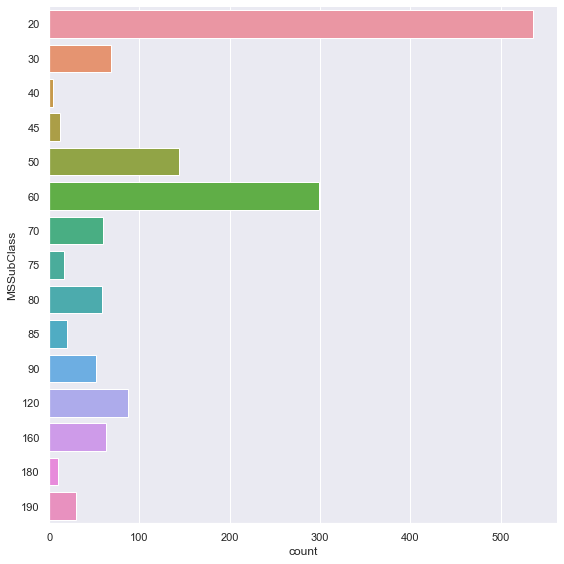

In [39]:
sb.catplot(y = "MSSubClass", data = dataset, kind = "count", height = 8)

In [40]:
# Number of unique Neighborhood categories in the Dataset
print("Number of Neighborhood Types: ", len(dataset["Neighborhood"].unique()))

Number of Neighborhood Types:  25


In [41]:
# Data for each Neighborhood category
print(dataset["Neighborhood"].value_counts())

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


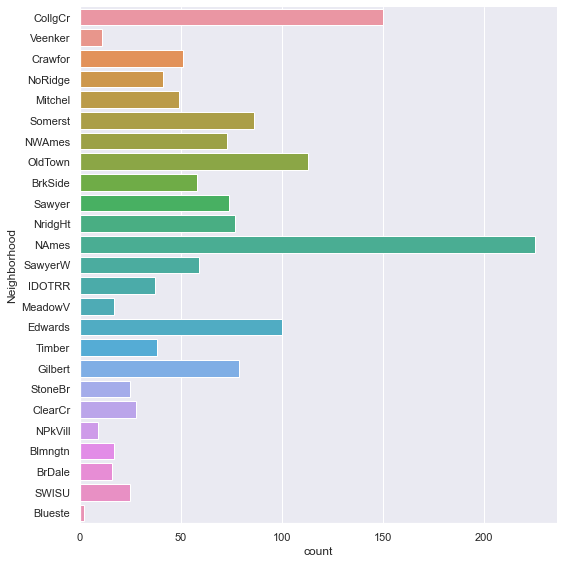

In [42]:
sb.catplot(y = "Neighborhood", data = dataset, kind = "count", height = 8)

In [43]:
# Number of unique BldgType categories in the Dataset
print("Number of BldgType Types: ", len(dataset["BldgType"].unique()))

Number of BldgType Types:  5


In [44]:
# Data for each BldgType category
print(dataset["BldgType"].value_counts())

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64


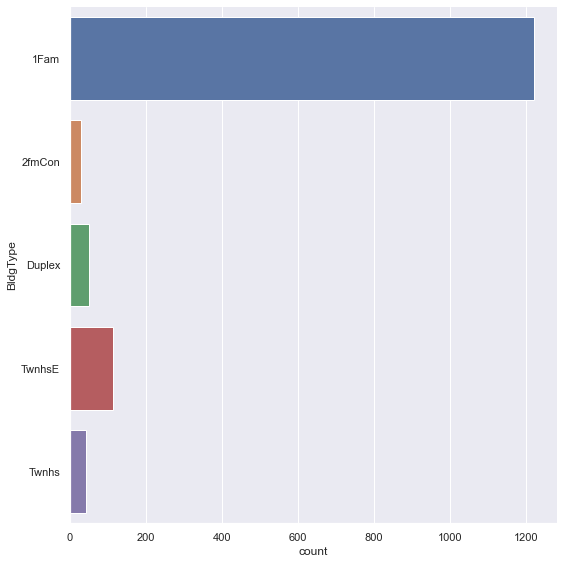

In [45]:
sb.catplot(y = "BldgType", data = dataset, kind = "count", height = 8)

In [47]:
# Number of unique OverallQual categories in the Dataset
print("Number of OverallQual Types: ", len(dataset["OverallQual"].unique()))

Number of OverallQual Types:  10


In [48]:
# Data for each OverallQual category
print(dataset["OverallQual"].value_counts())

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64


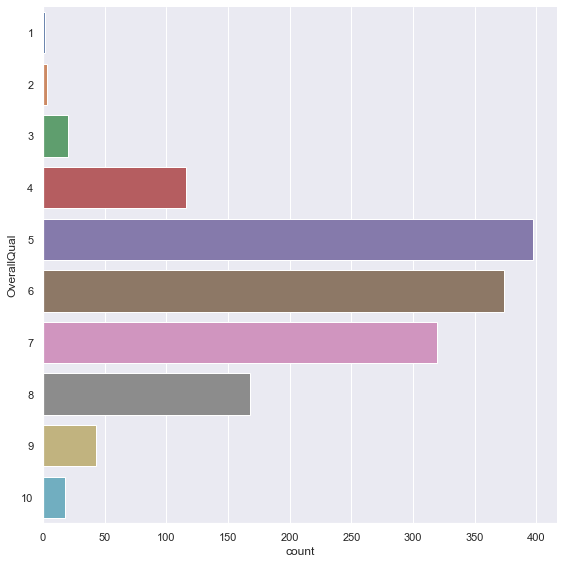

In [49]:
sb.catplot(y = "OverallQual", data = dataset, kind = "count", height = 8)

### Neighborhood has the highest number of levels/categories (25). The neighborhood "NAmes" has the highest number of houses (225).

## 2b: Choose the top two variables that you think will help us the most in predicting ‘SalePrice’ of houses in this data.

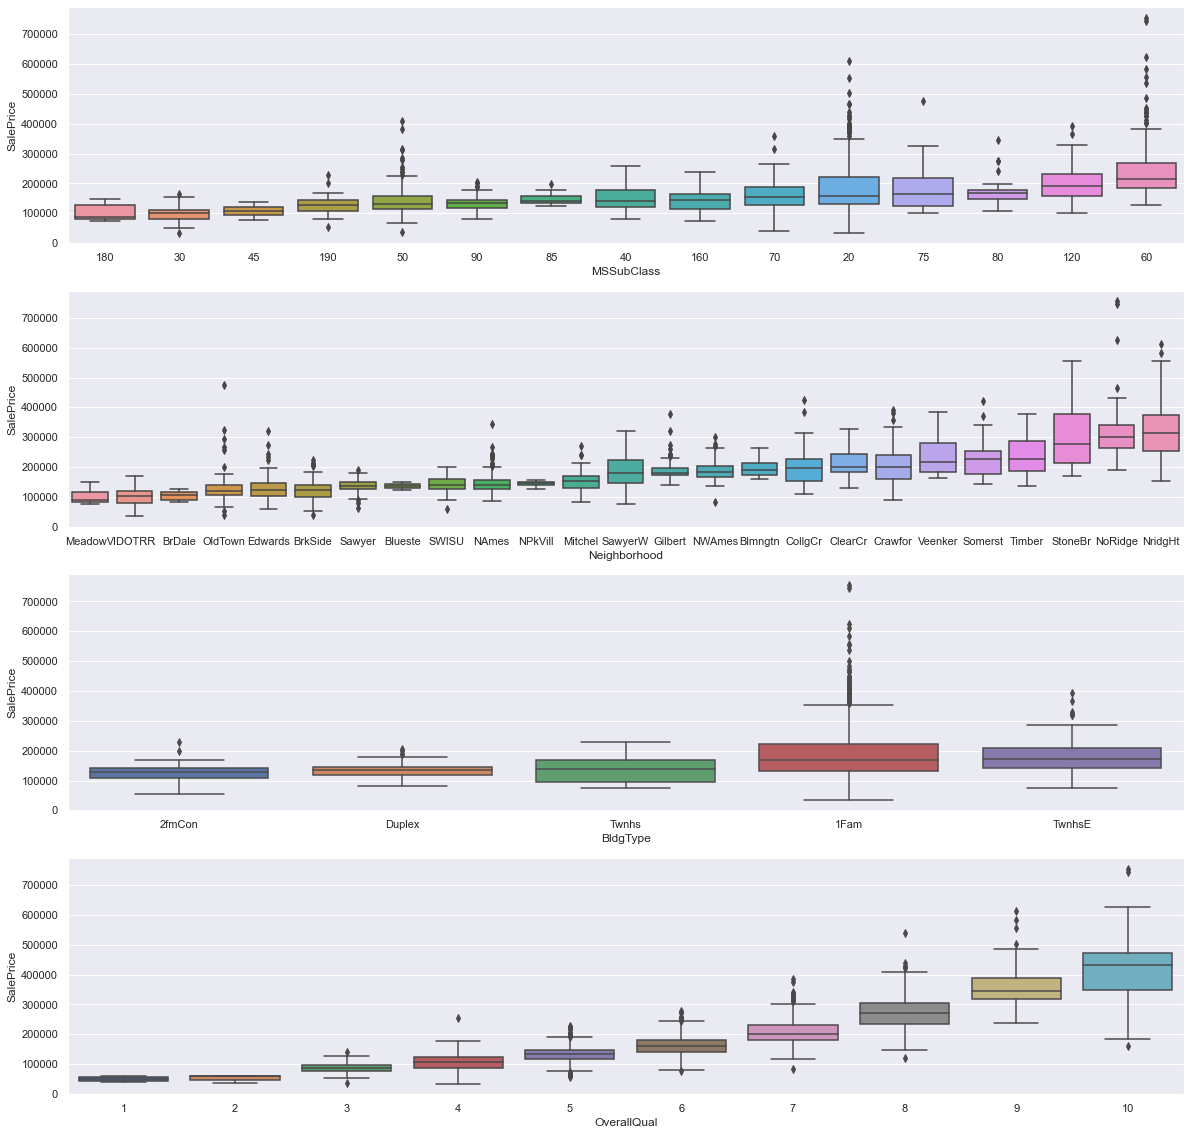

In [53]:
categorical = ['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']
fig, ax = plt.subplots(4,1, figsize=(20, 20))
for var, subplot in zip(categorical, ax.flatten()):
    sorted_nb = dataset.groupby([var])['SalePrice'].median().sort_values()
    sb.boxplot(x=var, y='SalePrice', data=dataset, ax=subplot, order=list(sorted_nb.index))

### Use OverallQual and Neighborhood to predict 'SalePrice' of houses. We can see a trend, a correlation for these two variables.

## 3a: Does the SalePrice of a house get affected by whether it has a Garage or not? Justify your answer using EDA.

In [54]:
# GarageType: Garage location

In [55]:
# Number of unique GarageType categories in the Dataset
print("Number of GarageType Types: ", len(dataset["GarageType"].unique()))

Number of GarageType Types:  7


In [57]:
dataset["GarageType"] = dataset["GarageType"].fillna("NA")
# Data for each GarageType category
print(dataset["GarageType"].value_counts())

Attchd     870
Detchd     387
BuiltIn     88
NA          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


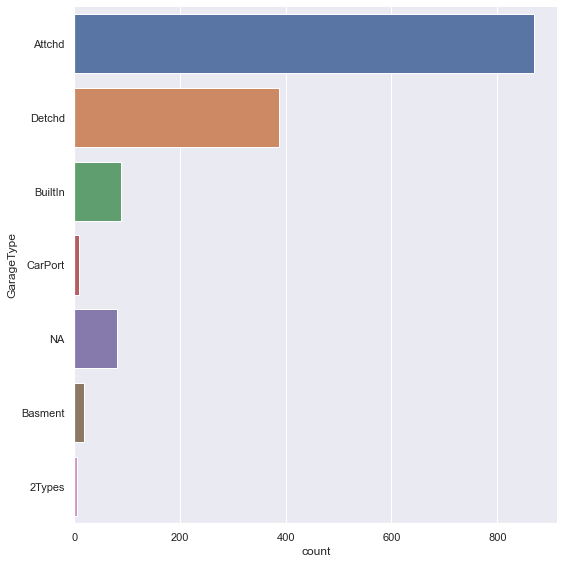

In [58]:
sb.catplot(y = "GarageType", data = dataset, kind = "count", height = 8)

In [60]:
dataset["GarageType"] = dataset["GarageType"].replace(np.nan, 'NA')
dataset["GarageType"].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'NA', 'Basment',
       '2Types'], dtype=object)

In [63]:
# Merge all non-NA GarageTypes as 1 type
dataset["GarageType"] = np.where((dataset.GarageType != 'NA'),'Garage', dataset.GarageType)
dataset["GarageType"].unique()

array(['Garage', 'NA'], dtype=object)

<AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>

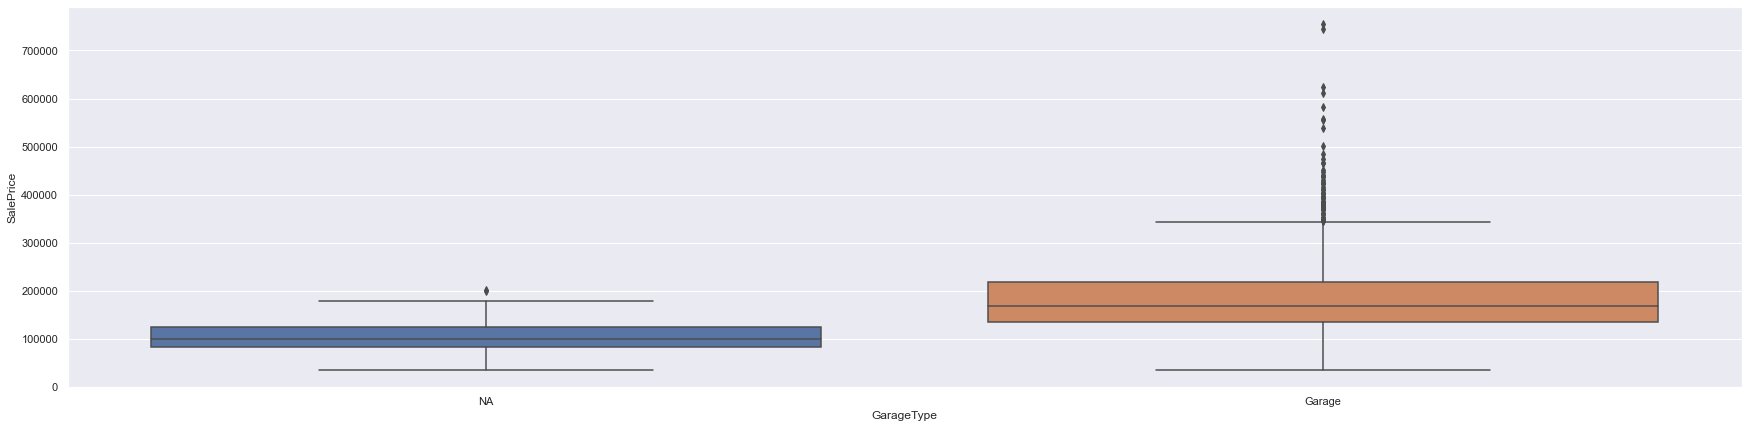

In [62]:
sorted_nb = dataset.groupby(["GarageType"])['SalePrice'].median().sort_values()
sb.boxplot(x=dataset["GarageType"], y=dataset["SalePrice"], order=list(sorted_nb.index))

Based on the boxplot, it is evident that SalePrice is affected by whether there is a Garage or not.